##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

# Preprocessing

In [28]:
import re
import time
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

## Import CSV

21802
neutral     12659
positive     5428
negative     3715
Name: sentiment, dtype: int64


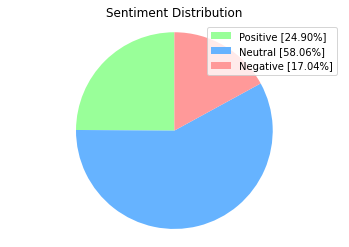

In [4]:
train_data = pd.read_csv("Train.csv", sep=',')
test_data = pd.read_csv("Test.csv", sep=',')

x = train_data.text
y = train_data.sentiment
print(len(y))
positive = '%.2f' % (int(y.value_counts()[1]) / len(y) * 100)
neutral = '%.2f' % (int(y.value_counts()[0]) / len(y) * 100)
negative = '%.2f' % (int(y.value_counts()[2]) / len(y) * 100)
print(y.value_counts())

#Creating PieCart
labels = ['Positive [' + str(positive) + '%]',
          'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['#99ff99', '#66b3ff', '#ff9999', '#ffcc99']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Distribution")
plt.axis('equal')
plt.show()

In [ ]:
## Clean up data

In [6]:
def preprocess(text: str) -> str:
    replacements = {
        # Replace links wih URL
        r'(http\S+)': 'URL',

        # Replace @'s with USERNAME
        r'@[A-Za-z0-9]+': 'USERNAME',

        # Replace characters repeated more than with two of the characters
        r'([a-zA-Z])(\1{2,})': '\\1\\1',

        # Remove incorrectly encoded emojis.
        r'...': '',

        '[0-9]+': '',
    }
    for original, replace in replacements.items():
        text = re.sub(original, replace, text)
    return text

X_train_raw = train_data['text'].apply(lambda x: preprocess(x))
test_data.text = test_data.text.apply(lambda x: preprocess(x))


X_train_raw.head()

print(X_train_raw[2])
print(train_data.iloc[2])

 i just found out naruto didn't become the th hokage....	
Unnamed: 0                                                    4
id                                           641096279930507000
text           i just found out naruto didn't become the 5th...
sentiment                                               neutral
Name: 2, dtype: object


## Test/Train Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train_raw,
                                                    train_data.sentiment,
                                                    test_size=0.4,
                                                    random_state=30)

## Vectorization

In [12]:
# Bag of words
vectorizer_bow = CountVectorizer()
x_train_bow = vectorizer_bow.fit_transform(X_train)
x_test_bow = vectorizer_bow.transform(X_test)

# Tf-idf

vectorizer_tf = TfidfVectorizer()
x_train_tf = vectorizer_tf.fit_transform(X_train)
x_test_tf = vectorizer_tf.transform(X_test)

In [13]:
## Finding K value for BoW

In [17]:

models = [
          LogisticRegression(max_iter=1000),
          LinearSVC(),
          RandomForestClassifier(),
          ]


accuracies = {}
for k in [100, 500, 1000]:
    accuracies[k] = {}
    x2 = SelectKBest(chi2, k=k)
    x2.fit(x_train_bow, y_train)
    X_train_x2 = x2.transform(x_train_bow)
    X_test_x2 = x2.transform(x_test_bow)
    Xs = [(x_train_bow, x_test_bow), (X_train_x2, X_test_x2)]
    X_names = ['complete', 'x2']
    for model in models:
        print('\n=========', model, '(with k=', k, 'features): ')
        accuracies[k][model] = {}
        for X_name, X in zip(X_names, Xs):
            X_train_t, X_test_t = X
            model.fit(X_train_t, y_train)
            y_test_predict = model.predict(X_test_t.todense())
            accuracy = accuracy_score(y_test, y_test_predict)
            print(X_name, 'accuracy is:', accuracy)
            accuracies[k][model][X_name] = accuracy



========= LogisticRegression(max_iter=1000) (with k= 100 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6539387684898521


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6493521385162252

========= LinearSVC() (with k= 100 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6198830409356725


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6496961357642472

========= RandomForestClassifier() (with k= 100 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6338722623552345


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6157550739594083

========= LogisticRegression(max_iter=1000) (with k= 500 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6539387684898521


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6650613461758973

========= LinearSVC() (with k= 500 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6198830409356725


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6632266941864465

========= RandomForestClassifier() (with k= 500 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6337575966058938


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6295149638802889

========= LogisticRegression(max_iter=1000) (with k= 1000 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6539387684898521


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6680426556587548

========= LinearSVC() (with k= 1000 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6198830409356725


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6634560256851278

========= RandomForestClassifier() (with k= 1000 features): 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


complete accuracy is: 0.6336429308565531


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


x2 accuracy is: 0.6401788785689715
{100: {LogisticRegression(max_iter=1000): {'complete': 0.6539387684898521, 'x2': 0.6493521385162252}, LinearSVC(): {'complete': 0.6198830409356725, 'x2': 0.6496961357642472}, RandomForestClassifier(): {'complete': 0.6338722623552345, 'x2': 0.6157550739594083}}, 500: {LogisticRegression(max_iter=1000): {'complete': 0.6539387684898521, 'x2': 0.6650613461758973}, LinearSVC(): {'complete': 0.6198830409356725, 'x2': 0.6632266941864465}, RandomForestClassifier(): {'complete': 0.6337575966058938, 'x2': 0.6295149638802889}}, 1000: {LogisticRegression(max_iter=1000): {'complete': 0.6539387684898521, 'x2': 0.6680426556587548}, LinearSVC(): {'complete': 0.6198830409356725, 'x2': 0.6634560256851278}, RandomForestClassifier(): {'complete': 0.6336429308565531, 'x2': 0.6401788785689715}}}


TypeError: unsupported operand type(s) for /: 'dict' and 'int'

In [21]:
for (k, v) in accuracies.items():
    methodaccuracy = {}
    for (method, methodict) in v.items():
        for type, score in methodict.items():
            if type not in methodaccuracy:
                methodaccuracy[type] = 0
            methodaccuracy[type] += score
    print(k, {k:v/len(models) for (k, v) in methodaccuracy.items()})

100 {'complete': 0.6358980239269197, 'x2': 0.638267782746627}
500 {'complete': 0.6358598020104728, 'x2': 0.6526010014142108}
1000 {'complete': 0.635821580094026, 'x2': 0.6572258533042846}


In [32]:
# Best K value for BoW

kbest = SelectKBest(chi2, k=500).fit(x_train_bow, y_train)
x_train_kbest = kbest.transform(x_train_bow)
x_test_kbest = kbest.transform(x_test_bow)

# save the created vocabulary for the given dataset in a separate file

vocab_dict = vectorizer_bow.vocabulary_
output_pd = pd.DataFrame(list(vocab_dict.items()), columns=['word', 'count'])
print(output_pd.shape)

output_pd.T.to_csv('BoW-vocab.csv', index=False)
print(vocab_dict)

(20533, 2)
{'because': 1593, 'fossil': 6747, 'fuels': 6927, 'are': 892, 'the': 17571, 'only': 12371, 'resources': 14645, 'that': 17563, 'allow': 517, 'us': 18657, 'to': 17872, 'travel': 18077, 'url': 18651, 'username': 18672, 'well': 19733, 'has': 7827, 'no': 11999, 'problem': 13667, 'telling': 17447, 'you': 20290, 'he': 7898, 'fully': 6936, 'supports': 17052, 'hamas': 7718, 'wonder': 20012, 'where': 19800, 'all': 495, 'donations': 5103, 'go': 7291, 'as': 981, 'seeing': 15499, 'black': 1898, 'activists': 191, 'criticise': 4031, 'word': 20037, 'appropriation': 852, 've': 19262, 'seen': 15506, 'leftists': 10023, 'lib': 10126, 'use': 18663, 'it': 9085, 'on': 12354, 'each': 5386, 'other': 12506, 'nice': 11920, 'day': 4323, 'here': 8015, 'in': 8639, 'london': 10339, 'today': 17877, 'we': 19669, 'wish': 19952, 'prince': 13631, 'george': 7142, 'third': 17692, 'line': 10210, 'throne': 17744, 'happy': 7777, 'nd': 11769, 'birthday': 1865, 'what': 19780, 'is': 9034, 'homeopathy': 8203, 'national'

## Initial Model Evaluation

In [ ]:
models = [
    DummyClassifier(strategy='most_frequent'),
    MultinomialNB(),
    LinearSVC(),
    KNeighborsClassifier(),
    LogisticRegression(),
]

for model in models:
    start = time.time()
    model.fit(x_train_bow.todense(), y_train)
    end = time.time()
    t = end - start
    acc = model.score(x_train_kbest.todense(), y_train)
    print(f"{model} BoW Train Accuracy: {acc}, Time: {t}")
    acc = model.score(x_test_kbest.todense(), y_test)
    print(f"{model} BoW Test Accuracy: {acc}, Time: {t}")
    end = time.time()
    t = end - start
    acc = model.score(x_train_tf, y_train)
    print(f"{model} TfIdf Train Accuracy: {acc}, Time: {t}")
    acc = model.score(x_test_tf, y_test)
    print(f"{model} TfIdf Test Accuracy: {acc}, Time: {t}")

# Parameter tuning

## Linear SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {"C": [0.1, 1, 10, 100],
              "max_iter": [100, 1000, 10000, 15000],
              "kernel":['linear'],
              }
grd = GridSearchCV(estimator=SVC(), param_grid=parameters, n_jobs=-1, cv=3)

grd.fit(x_train_kbest, y_train)

print(grd.best_params_)

In [ ]:
from sklearn.model_selection import validation_curve

param_range_linear = np.logspace(-2, 2, 10)
train_scores_linear, valid_scores_linear = validation_curve(
    LinearSVC(),
    x_train_kbest,
    y_train,
    param_name='C',
    param_range=param_range_linear,
    cv=3,
    n_jobs=-1, verbose=10)

In [ ]:
def val_curve(param_range, train_scores, valid_scores, model_name):
    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    mean_valid_scores = np.mean(valid_scores, axis=1)
    std_valid_scores = np.std(valid_scores, axis=1)
    plt.semilogx(param_range, mean_train_scores, label="Training score",
                 color='red')
    plt.fill_between(param_range, mean_train_scores - std_train_scores,
                     mean_train_scores + std_train_scores, alpha=0.2, color="red")

    plt.semilogx(param_range, mean_valid_scores, label="cross validation score",
                 color='blue')
    plt.fill_between(param_range, mean_valid_scores - std_valid_scores,
                     mean_valid_scores + std_valid_scores, alpha=0.2, color="blue")

    plt.legend(loc='best')
    plt.title(f"Validation curve for hyperparameter C in {model_name}")
    plt.xlabel("C in log scale")
    plt.ylabel("Accuracy")
    plt.show()
    best_C = param_range[mean_valid_scores.argmax()]
    print(best_C)

In [24]:
val_curve(param_range_linear,train_scores_linear, valid_scores_linear, "LinearSVC")

NameError: name 'val_curve' is not defined

In [ ]:
from sklearn.svm import SVC
svclin = SVC(kernel="linear", C=4.6415888336127775).fit(x_train_bow, y_train)

print(svclin.score(x_train_kbest, y_train))
print(svclin.score(x_test_kbest, y_test))

# RBF Kernel SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {"C": [0.1, 1, 10, 100],
              "max_iter": [100, 1000, 10000, 15000],
              "kernel":['linear'],
              }
grd = GridSearchCV(estimator=SVC(), param_grid=parameters, n_jobs=-1, cv=3)

grd.fit(x_train_kbest, y_train)

print(grd.best_params_)

In [ ]:
param_range = np.logspace(-2, 2, 10)
train_scores_rbf, valid_scores_rbf = validation_curve(
    SVC(max_iter=10000),
    X_train_x2,
    y_train,
    param_name='C',
    param_range=param_range,
    cv=3,
    n_jobs=-1, verbose=10)

In [ ]:
val_curve(param_range, train_scores_rbf, valid_scores_rbf, "rbf")

# As C increases the decision boundaries become more strict and the training score increases. The cross validation maximum can be seen

## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"n_estimators": [10, 25, 50, 75, 100, 150, 200],
              "max_depth": [10, 25, 50, 75, 100, 150, 200],
              "criterion": ["entropy", "gini"],
              }
grd = GridSearchCV(estimator=RandomForestClassifier(random_state=1, n_jobs=-1),
                   param_grid=parameters, n_jobs=-1, cv=3)
grd.fit(X_train_x2, y_train)
print(grd.best_params_)

In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(
    random_state=1,
    n_jobs=-1,
    criterion="gini",
    max_depth=75,
    n_estimators=150).fit(x_train_kbest, y_train)

print(random_forest.score(x_train_kbest, y_train))
print(random_forest.score(x_test_kbest, y_test))

NameError: name 'x_train_kbest' is not defined

## Logistic Regression

In [39]:

parameters = {"max_iter": [1000, 10000],
              "C": [1, 3, 5, 9,10, 25, 50],
              }


grd = GridSearchCV(estimator=LogisticRegression(random_state=1, n_jobs=-1),
                   param_grid=parameters, n_jobs=-1, cv=3)
grd.fit(x_train_kbest, y_train)
print(grd.best_params_)

{'C': 50, 'max_iter': 1000}


In [41]:
lr = LogisticRegression(C=1, max_iter=10000).fit(x_train_kbest, y_train)
print(lr.score(x_train_kbest, y_train))
print(lr.score(x_test_kbest, y_test))
lr_pred = lr.predict(x_test_kbest)

0.7108019264582218
0.6650613461758973


Text(50.722222222222214, 0.5, 'Actual classes')

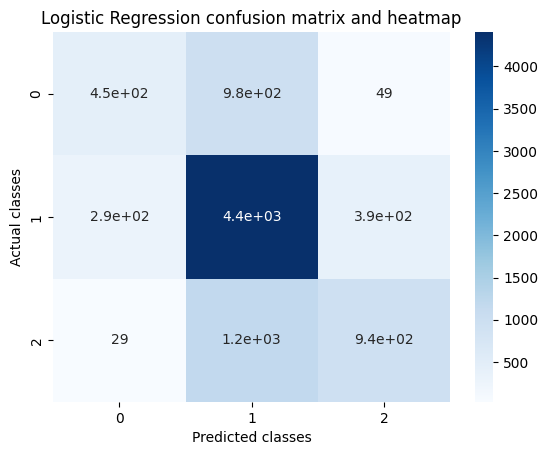

In [42]:


matrix_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(matrix_lr, cmap='Blues', annot=True)
plt.title("Logistic Regression confusion matrix and heatmap")
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")

### Ensemble models

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# bagging
bagging_lr_10 = BaggingClassifier(base_estimator=LogisticRegression(),
                                  n_estimators=10,
                                  max_samples=0.5, max_features=0.5)
start = time.time()
bagging_lr_10.fit(x_train_kbest, y_train)
end = time.time()
t = end - start
print("Bagging Accuracy:", bagging_lr_10.score(x_test_kbest, y_test), 'time:', t)

bagging_lr_10 = BaggingClassifier(base_estimator=LogisticRegression(),
                                  n_estimators=10,
                                  max_samples=1, max_features=0.5)
start = time.time()
bagging_lr_10.fit(x_train_kbest, y_train)
end = time.time()
t = end - start
print("Bagging Accuracy:", bagging_lr_10.score(x_test_kbest, y_test), 'time:', t)

#random forest
rf = RandomForestClassifier(n_jobs=-1, n_estimators=14, verbose=1).fit(x_train_kbest,
                                                                       y_train)
print(rf.score(x_test_kbest, y_test))

rf = RandomForestClassifier(n_jobs=-1, n_estimators=10, verbose=1).fit(x_train_kbest,
                                                                       y_train)
print(rf.score(x_test_kbest, y_test))

#ada
ada = AdaBoostClassifier().fit(x_train_kbest, y_train)
print(ada.score(x_test_kbest, y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Bagging Accuracy: 0.6522187822497421 time: 5.85807991027832
Bagging Accuracy: 0.5834193326453389 time: 1.1093690395355225


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.2s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   2 out of  14 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=14)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


0.6131177617245729


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


0.6068111455108359
0.6329549363605091


In [ ]:
# stacking code from prac 8
np.random.seed(1)


class StackingClassifier():

    def __init__(self, classifiers, metaclassifier):
        self.classifiers = classifiers
        self.metaclassifier = metaclassifier

    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        X_meta = self._predict_base(X)
        self.metaclassifier.fit(X_meta, y)

    def _predict_base(self, X):
        yhats = []
        for clf in self.classifiers:
            yhat = clf.predict_proba(X)
            yhats.append(yhat)
        yhats = np.concatenate(yhats, axis=1)
        assert yhats.shape[0] == X.shape[0]
        return yhats

    def predict(self, X):
        X_meta = self._predict_base(X)
        yhat = self.metaclassifier.predict(X_meta)
        return yhat

    def score(self, X, y):
        yhat = self.predict(X)
        return accuracy_score(y, yhat)

In [ ]:
# base calssifier to be chosen # lr/multinomial
classifiers = [LogisticRegression(),
               KNeighborsClassifier(),
               MultinomialNB()]
titles = ['Logistic Regression',
          'KNN',
          'Multinomial NB']

# three meta classifiers
meta_classifier_lr = LogisticRegression()
stacker_lr = StackingClassifier(classifiers, meta_classifier_lr)

meta_classifier_dt = DecisionTreeClassifier()
stacker_dt = StackingClassifier(classifiers, meta_classifier_dt)

meta_classifier_svc = LinearSVC()
stacker_svc = StackingClassifier(classifiers, meta_classifier_svc)

In [ ]:
start = time.time()
stacker_lr.fit(x_train_kbest.todense(), y_train)
end = time.time()
t = end - start
acc_lr = stacker_lr.score(x_test_kbest.todense(), y_test)
print('\nStacker Accuracy (Logistic Regression):', acc_lr, 'Time:', t)

start = time.time()
stacker_dt.fit(x_train_kbest.todense(), y_train)
end = time.time()
t = end - start
acc_dt = stacker_dt.score(x_test_kbest.todense(), y_test)
print('\nStacker Accuracy (Decision Tree):', acc_dt, 'Time:', t)

start = time.time()
stacker_svc.fit(x_train_kbest.todense(), y_train)
end = time.time()
t = end - start
acc_svc = stacker_svc.score(x_test_kbest.todense(), y_test)
print('\nStacker Accuracy (LinearSVC):', acc_svc, 'Time:', t)